In [1]:
import pickle
import numpy as np
import collections
import matplotlib.pyplot as plt
import powerlaw

In [ ]:
grid_size = 1024
density = 0.59
replicates = [1,2,3,4,5]
t = []
numbers_per_replicate = 2000000

for replicate in replicates:
    filename_np = "np_transformations_" + str(grid_size) + "_" + str(density) + "_" + str(numbers_per_replicate) + "_" + str(replicate) + ".txt"
    with open(filename_np) as f:
        t.extend([tuple(map(int, i.split(' '))) for i in f])    

scs = [abs(i[1]-i[0]) for i in t]

fit = powerlaw.Fit(scs,discrete=True,estimate_discrete = False) #If you already know xmin pass it as an argument (xmin=value) for speed  

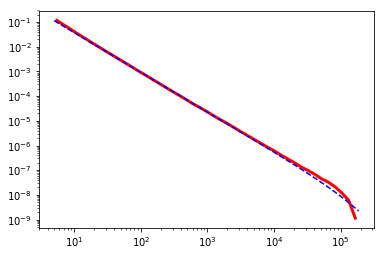

x_min:  5.0
alpha:  1.608492481011573
1/lambda:  224091.12666884402


/home/ayan/.local/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions


LR (Power Law):  71.968492338504  p-value:  0.0
LR (Exponential):  323.7329427868806  p-value:  0.0
LR (Log-Normal):  88.96149493998378  p-value:  0.0
LR (Stretched-Exponential):  86.20316799473797  p-value:  0.0


In [4]:
fig = fit.plot_pdf(color ='r',linewidth=3)
fit.truncated_power_law.plot_pdf(color='b',linestyle='--',ax=fig)
#x = fit.xmins
#y = fit.Ds
plt.show()

print('x_min: ',fit.xmin)
print('alpha: ',fit.truncated_power_law.parameter1)
print('1/lambda: ',1/fit.truncated_power_law.parameter2)


comparison_tpl_exp = fit.distribution_compare('truncated_power_law','exponential',normalized_ratio=True)
comparison_tpl_streched_exp = fit.distribution_compare('truncated_power_law','stretched_exponential',normalized_ratio=True)
comparison_tpl_log_normal = fit.distribution_compare('truncated_power_law','lognormal',normalized_ratio=True)
comparison_tpl_pl = fit.distribution_compare('truncated_power_law','power_law',normalized_ratio=True)

print("LR (Power Law): ",comparison_tpl_pl[0]," p-value: ",comparison_tpl_pl[1])
print("LR (Exponential): ",comparison_tpl_exp[0]," p-value: ",comparison_tpl_exp[1])
print("LR (Log-Normal): ",comparison_tpl_log_normal[0]," p-value: ",comparison_tpl_log_normal[1])
print("LR (Stretched-Exponential): ",comparison_tpl_streched_exp[0]," p-value: ",comparison_tpl_streched_exp[1])